In [ ]:
%matplotlib inline


# Kernel PCA

This example shows that Kernel PCA is able to find a projection of the data
that makes data linearly separable.


Automatically created module for IPython interactive environment
[[-0.53667782 -0.82537034]
 [-0.17512266 -0.08581019]
 [-0.13149458 -0.30538719]
 [ 0.9689349  -0.10125916]
 [-0.03943988  0.30079751]
 [-0.30119167  0.96266557]
 [ 0.12656866 -0.99958443]
 [-0.17282442  0.25759824]
 [-0.30613418 -0.93949118]
 [ 0.21363899  0.16679369]
 [ 0.47187212  0.81425537]
 [-0.46044074 -0.84246128]
 [-0.94962648 -0.41701148]
 [-0.02548118 -0.31429756]
 [ 0.91432584  0.28432436]
 [-0.22137453  1.01427462]
 [-0.33344324 -0.00787824]
 [-0.28296375 -0.97984591]
 [ 0.30178383  0.04024797]
 [ 1.0340835   0.0033267 ]
 [ 0.69268876 -0.7537153 ]
 [-0.23989496  0.28381735]
 [-0.78841159 -0.70988792]
 [-0.0860301  -0.29731454]
 [ 0.61029279 -0.69766785]
 [-0.24913184 -0.11472326]
 [-0.78605755  0.642294  ]
 [ 0.91095884  0.31536086]
 [-0.1736525   0.14723845]
 [-1.03064716 -0.08233819]
 [ 0.61247234 -0.81482219]
 [-0.40020281  0.07499215]
 [-0.15005314 -0.21188337]
 [ 0.17752954  0.28895089]
 [-0.43967332  0.

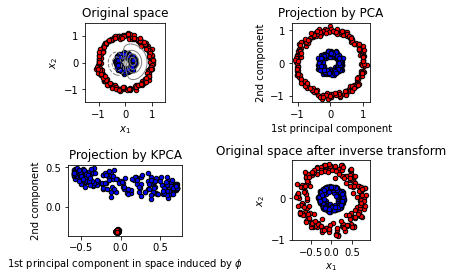

In [ ]:
print(__doc__)

# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

print(X)
print(y)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()